# 004_checking_impulse_sounds

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from checking_impulse_sound import *
import librosa

from IPython.display import Audio

In [2]:
def open_and_plot_audio(url, sr):
  signal, _ = librosa.load(
      url,
      sr=sr,
      mono=True,)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=150)

  # Plot the audio signal
  ax1.plot(np.arange(len(signal)) / sr, signal)
  ax1.set_title('Audio Signal')
  ax1.set_xlabel('Time (s)')
  ax1.set_ylabel('Amplitude')

  # Calculate the spectrogram
  S = librosa.stft(signal, n_fft=2048, hop_length=512)
  S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

  # Plot the spectrogram
  img = librosa.display.specshow(
      S_dB,
      sr=sr,
      n_fft=2048,
      hop_length=512,
      x_axis='time',
      y_axis='log',
      ax=ax2)
  fig.colorbar(img, ax=ax2, format='%+2.0f dB')
  ax2.set_title('Spectrogram')

  plt.tight_layout()
  plt.show()

  return signal

In [3]:
def remove_signal_edge_silence(sig, threshold=1e-7):
  """
  Remove silence at left and right edges of a signal

  Parameters
  ----------
  sig: numpy array with shape (n_channels, n_samples_ini)
     waveform of the input signal

  threshold: float (default 1e-7)
    threshold of the energy normalized cumulative sum used to detect
    silence durations

  Returns
  -------
  numpy array with shape (n_channels, n_samples_out)
     waveform of the input signal with start and end silences removed
  """

  energy = np.mean(np.square(sig), axis=0)

  left_cumsum = np.cumsum(energy)
  left_cumsum /= np.max(left_cumsum)
  left_cut_idx = np.sum(left_cumsum < threshold)

  right_cumsum = np.cumsum(energy[::-1])
  right_cumsum /= np.max(right_cumsum)
  right_cut_idx = len(energy) - np.sum(right_cumsum < threshold)

  #   plt.figure()
  #   plt.plot(energy/np.max(energy))
  #   plt.plot(left_cumsum, 'r')
  #   plt.plot(right_cumsum[::-1], 'k')
  #   plt.stem([left_cut_idx], [1.], 'r')
  #   plt.stem([right_cut_idx], [1.], 'k')

  return sig[:, left_cut_idx:right_cut_idx]

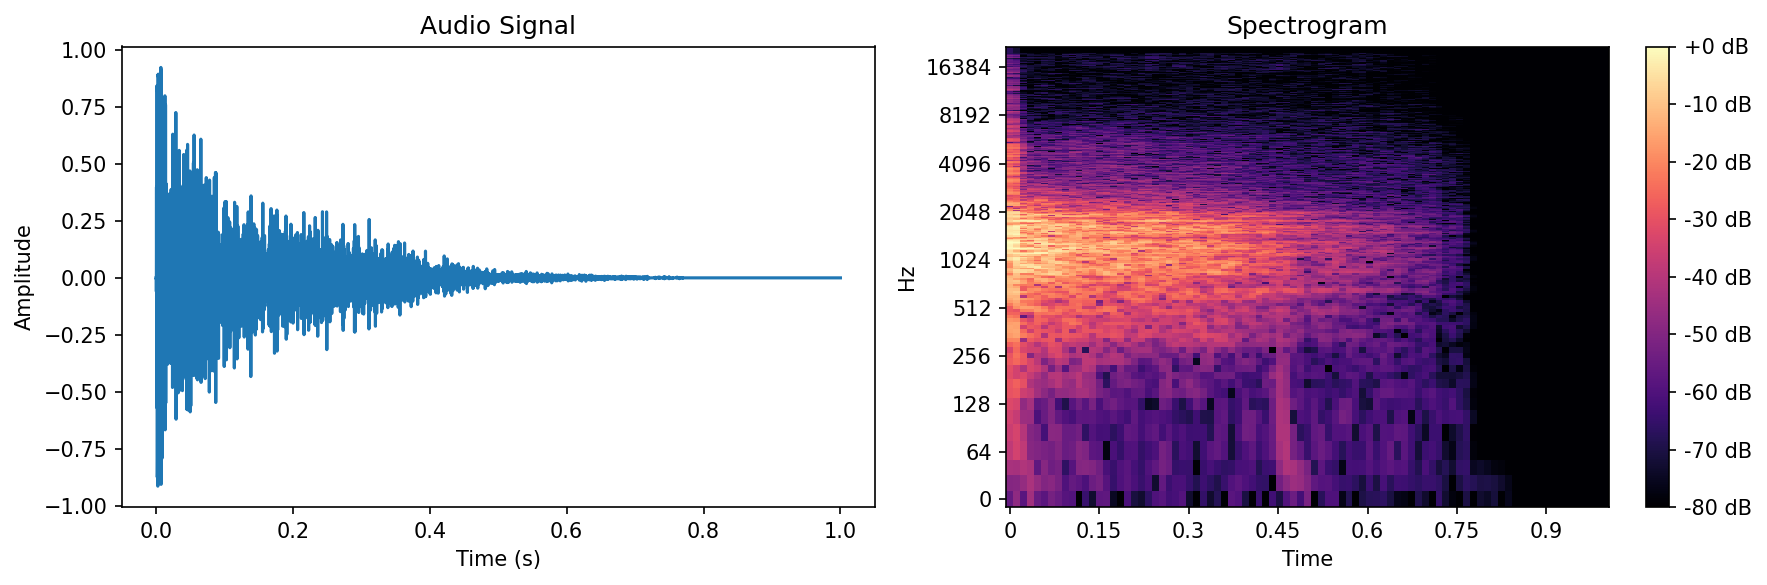

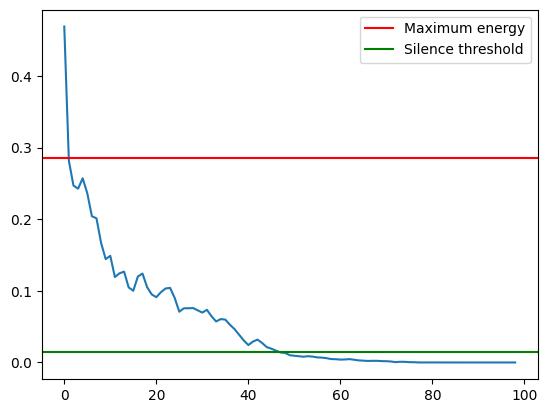

Silence proportion:  0.5252525252525253


True

In [4]:
sr = 44100

noise = open_and_plot_audio(
    "/home/admin/audible/protected/dev/rendering/studies/006_impulsive_sound_rejection/001_impulse_sound_detection/impulsive_sounds/clap-drum-wet-low.wav",
    44100)

module = CheckingIfImpulse(sr=sr)
module.forward(noise, plot_figure=True)

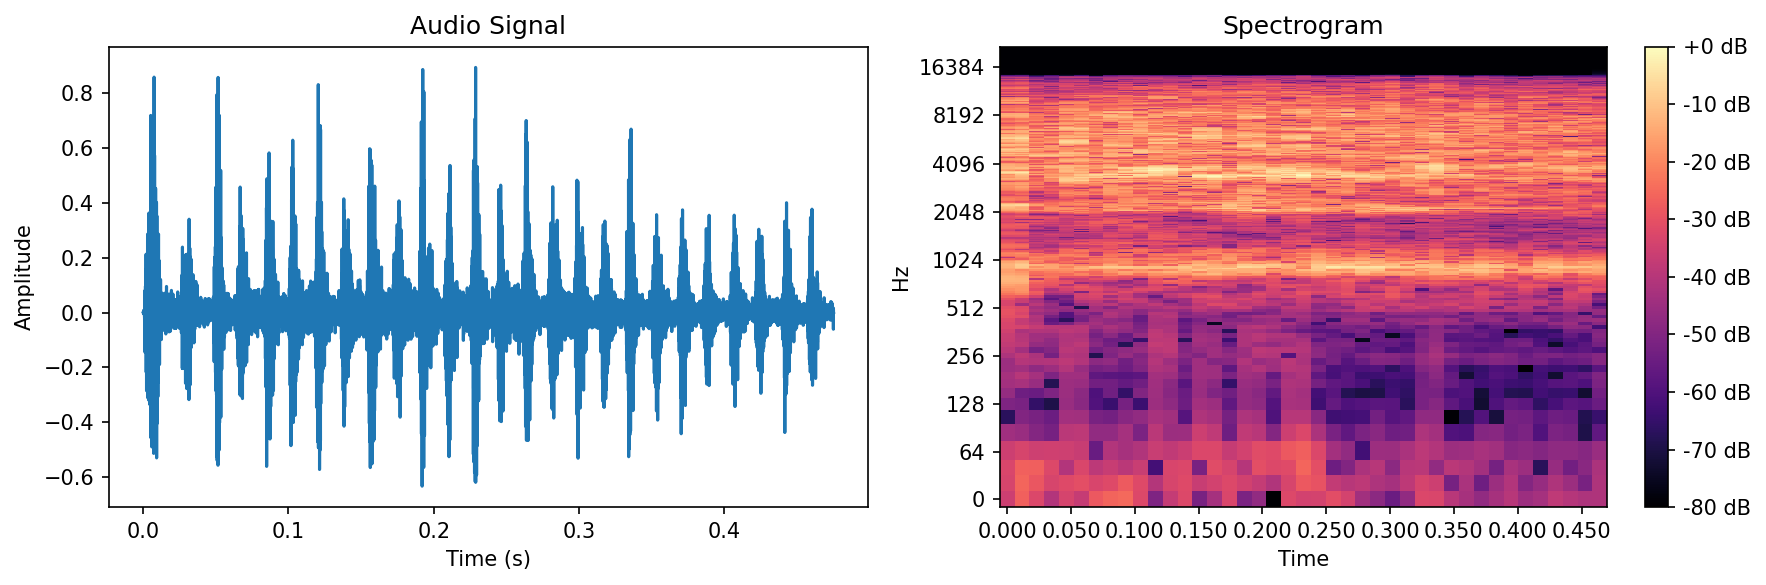

True

In [5]:
noise = open_and_plot_audio(
    "/home/admin/audible/protected/dev/rendering/studies/006_impulsive_sound_rejection/001_impulse_sound_detection/impulsive_sounds/guiro-roll.wav",
    sr)


module = CheckingIfImpulse(sr=sr)
module.forward(noise, plot_figure=True)

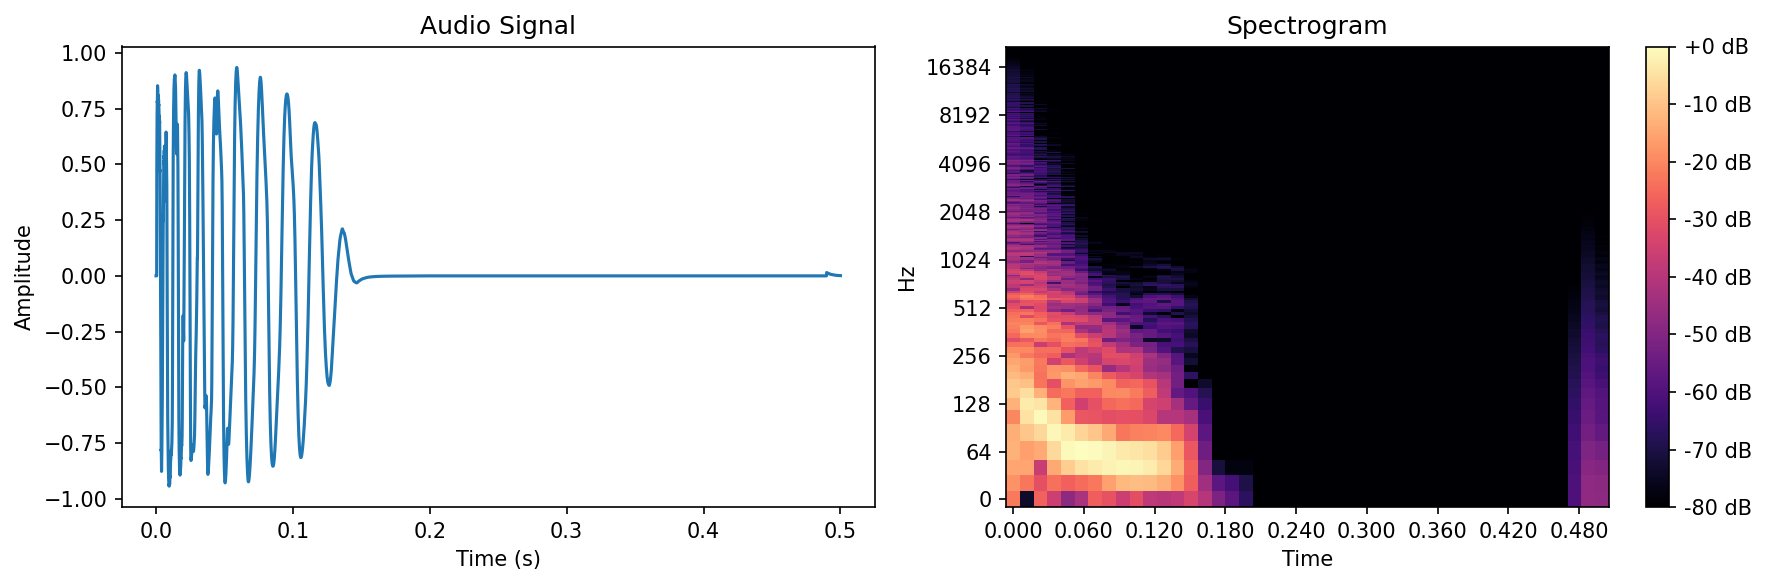

True

In [6]:
noise = open_and_plot_audio(
    "/home/admin/audible/protected/dev/rendering/studies/006_impulsive_sound_rejection/001_impulse_sound_detection/impulsive_sounds/kick-drum-thud.wav",
    sr)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr)
module.forward(noise, plot_figure=True)

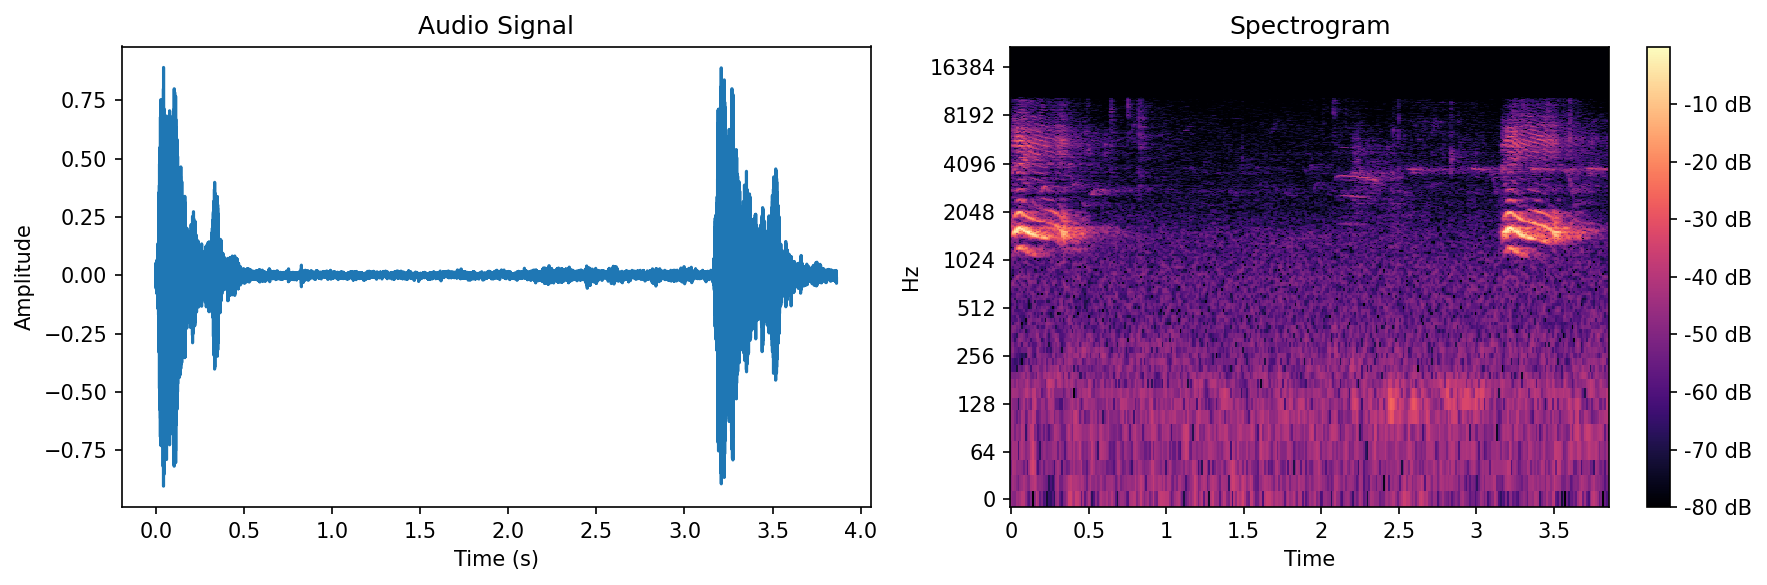

NameError: name 'sr' is not defined

In [5]:
# noise = open_and_plot_audio(
#     "/home/admin/audible/protected/dev/rendering/studies/006_impulsive_sound_rejection/001_impulse_sound_detection/impulsive_sounds/rollin_A#_minor.wav",
#     sr)

noise = open_and_plot_audio(
    "/home/admin/mnt/tsi/audiosig/audible/dcase/data/ESC-50v2_only_impulses/ESC-50/audio/3-117293-A-9.wav",
    44100)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr)
module.forward(noise, plot_figure=True)

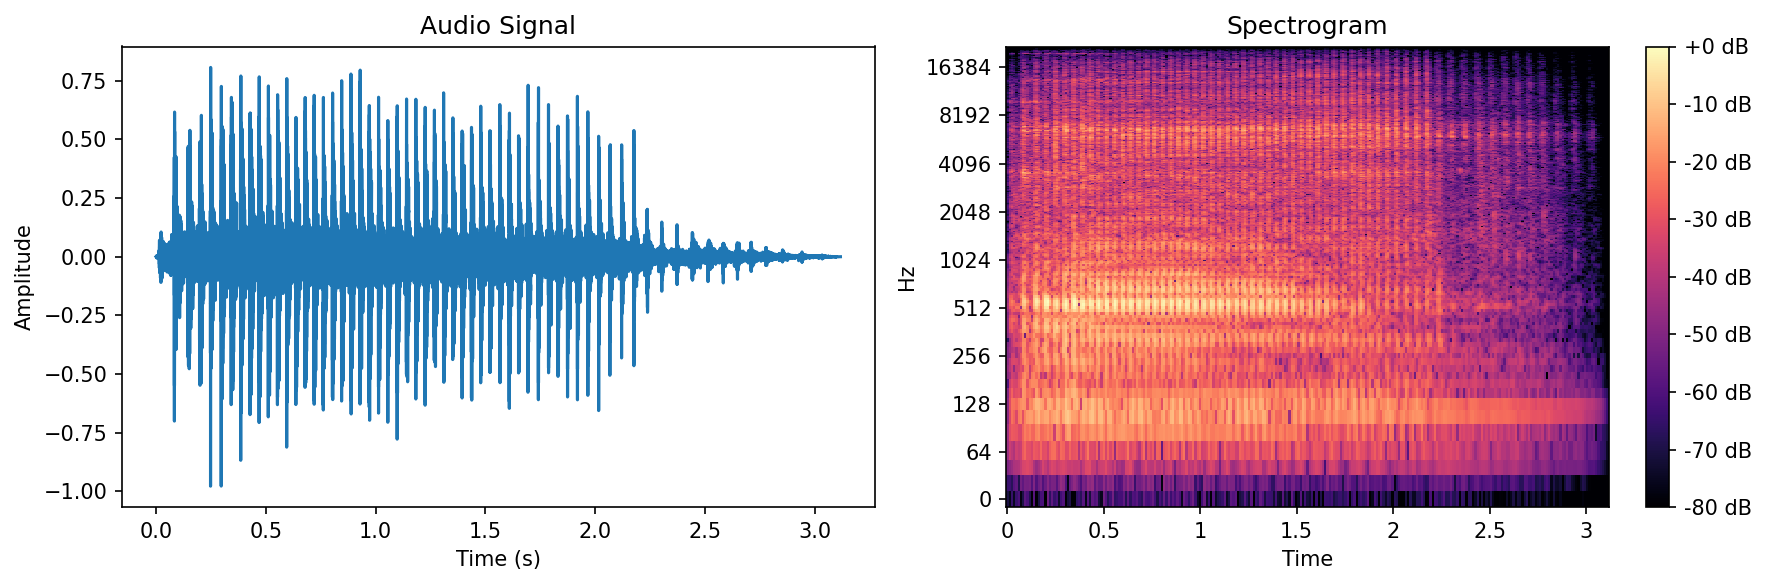

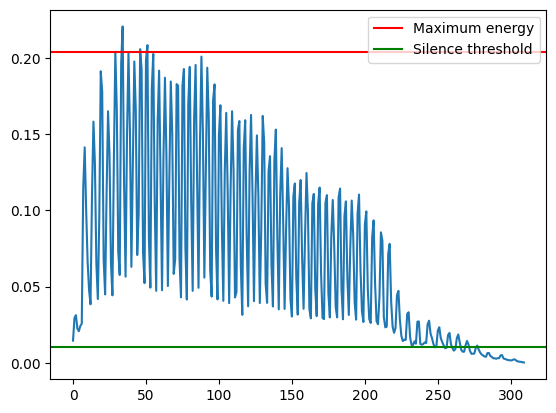

Silence proportion:  0.14838709677419354


False

In [8]:
noise = open_and_plot_audio(
    "/home/admin/audible/protected/dev/rendering/studies/006_impulsive_sound_rejection/001_impulse_sound_detection/impulsive_sounds/TOOLPowr_Marteau piqueur pneumatique 4 (ID 3128)_LS.wav",
    sr)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr)
module.forward(noise, plot_figure=True)

In [9]:
from adasp_data_management import event
import os

In [10]:
os.environ["ADASP_DATA"]

'/home/admin/mnt/tsi'

In [28]:
dataset = event.Nonspeech7k()

pdf_metadata = dataset.pdf_metadata

# pdf_metadata

Nonspeech7k: load metadata file /home/admin/mnt/tsi/dcase/Nonspeech7k/metadata.csv


In [29]:
# open random audio file

# label = "fireworks"
# meta_bis = pdf_metadata[pdf_metadata["label"] == label]

idx = np.random.randint(0, len(pdf_metadata))
file_path = pdf_metadata.iloc[idx]["file_path"]
print(file_path)


# 15; "footsteps"
# 6; "fireworks"

/home/admin/mnt/tsi/dcase/Nonspeech7k/train/k8fI3Kkm3GM-80_0_0.wav


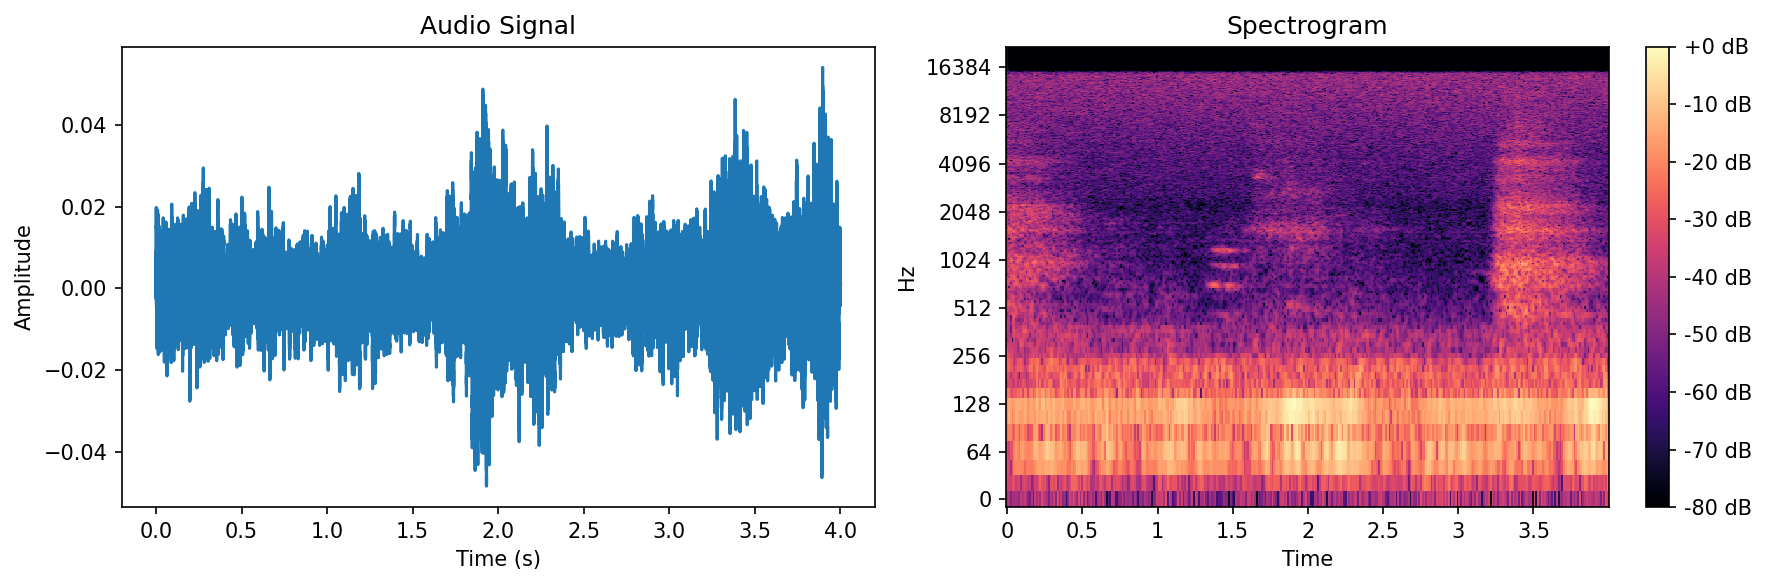

(176400,)


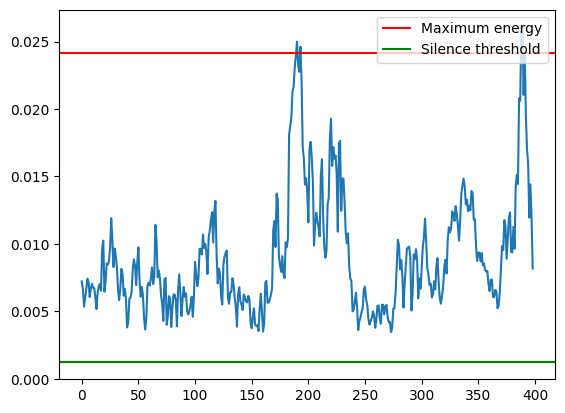

Silence proportion:  0.0


False

In [31]:
import time
noise = open_and_plot_audio(
    file_path,
    sr)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr, min_energy_threshold=0.05)

print(noise.shape)

start = time.time()
noise = remove_signal_edge_silence(
    noise.reshape(-1, 1), threshold=0.001 * np.max(np.abs(noise)))
module.forward(noise, plot_figure=True)
# print(time.time() - start)

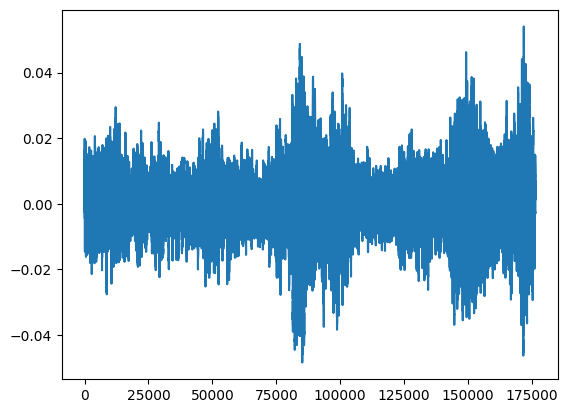

In [32]:
noise_remove_silence = remove_signal_edge_silence(
    noise.reshape(1, -1), threshold=np.max(np.abs(noise)) * 1e-4)

plt.figure()
plt.plot(noise_remove_silence.flatten())

display(Audio(noise_remove_silence.flatten(), rate=sr))

In [15]:
from adasp_data_management import music

In [ ]:
dataset_drums = music.FreesoundOneShotPercussive()

pdf_metadata_drums = dataset_drums.pdf_metadata

pdf_metadata_drums

FreesoundOneShotPercussive: load metadata file /home/admin/mnt/tsi/mir/freesound_one_shot_percussive_sounds/metadata.csv


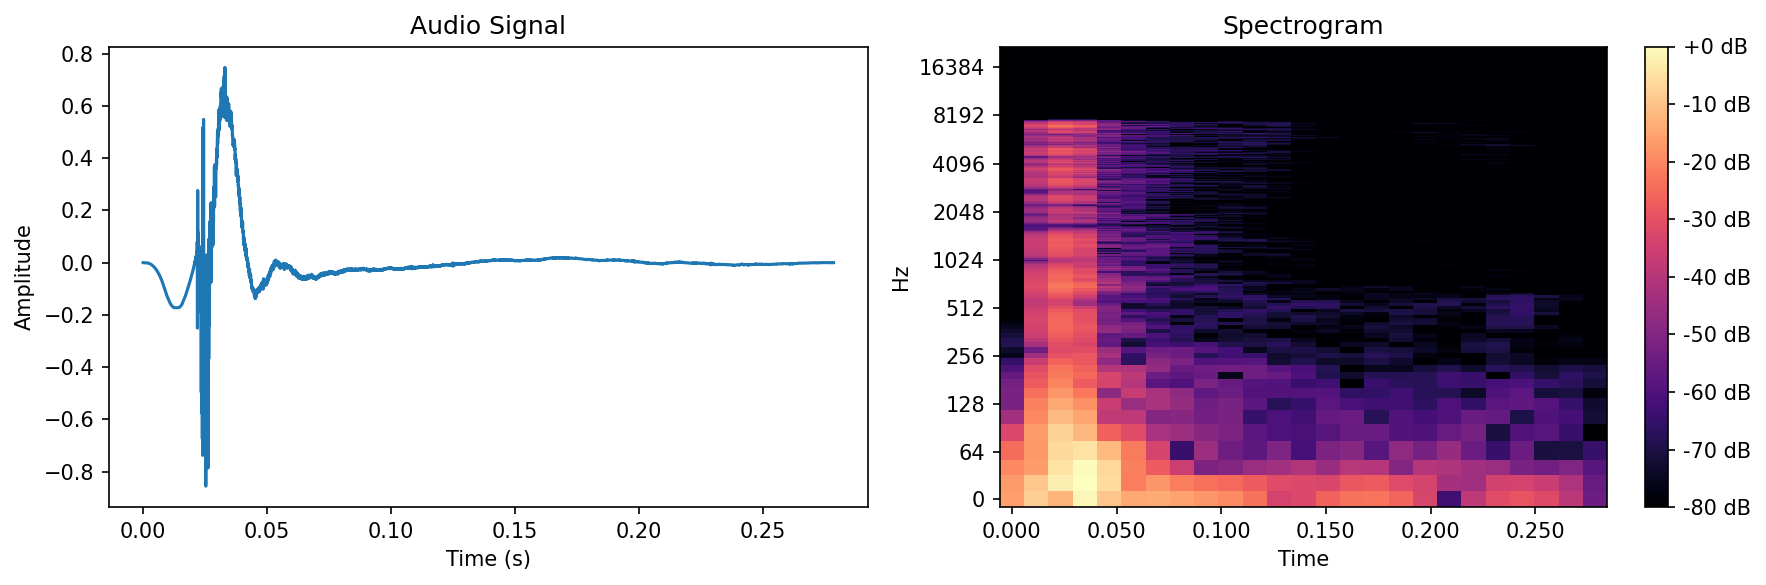

True

In [ ]:
idx = np.random.randint(0, len(pdf_metadata_drums))
file_path = pdf_metadata_drums.iloc[idx]["file_path"]

noise = open_and_plot_audio(
    file_path,
    sr)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr, min_energy_threshold=0.05)


start = time.time()
module.forward(noise, plot_figure=True)
# print(time.time() - start)

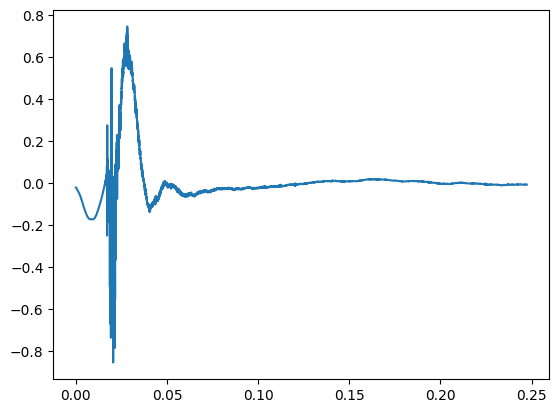

In [18]:
noise_remove_silence = remove_signal_edge_silence(
    noise.reshape(1, -1), threshold=np.max(np.abs(noise)) * 1e-4)

plt.figure()
plt.plot(np.arange(len(noise_remove_silence.flatten())) /
         sr, noise_remove_silence.flatten())

display(Audio(noise_remove_silence.flatten(), rate=sr))

In [ ]:
dataset_drums_2 = music.DrumSamples()

pdf_metadata_drums_2 = dataset_drums_2.pdf_metadata

pdf_metadata_drums_2

DrumSamples: load metadata file /home/admin/mnt/tsi/mir/drum_samples_collections/metadata.csv


,file_path,instrument,type,n_channels,sampling_rate,duration,cutoff_freq
0,/home/admin/mnt/tsi/mir/drum_samples_collectio...,shaker,shuffle,1,44100,0.450612,18669
1,/home/admin/mnt/tsi/mir/drum_samples_collectio...,kick,dry,1,44100,0.257596,4026
2,/home/admin/mnt/tsi/mir/drum_samples_collectio...,tom,acoustic02,1,44100,0.728934,10723
3,/home/admin/mnt/tsi/mir/drum_samples_collectio...,openhat,tight,1,44100,0.287347,19056
4,/home/admin/mnt/tsi/mir/drum_samples_collectio...,hihat,dist02,1,44100,0.559819,15719
...,...,...,...,...,...,...,...
3466,/home/admin/mnt/tsi/mir/drum_samples_collectio...,perc,,2,44100,0.463039,9905
3467,/home/admin/mnt/tsi/mir/drum_samples_collectio...,perc,,2,44100,0.184785,14104
3468,/home/admin/mnt/tsi/mir/drum_samples_collectio...,perc,,2,44100,0.249501,11068
3469,/home/admin/mnt/tsi/mir/drum_samples_collectio...,perc,,2,44100,0.242154,12639


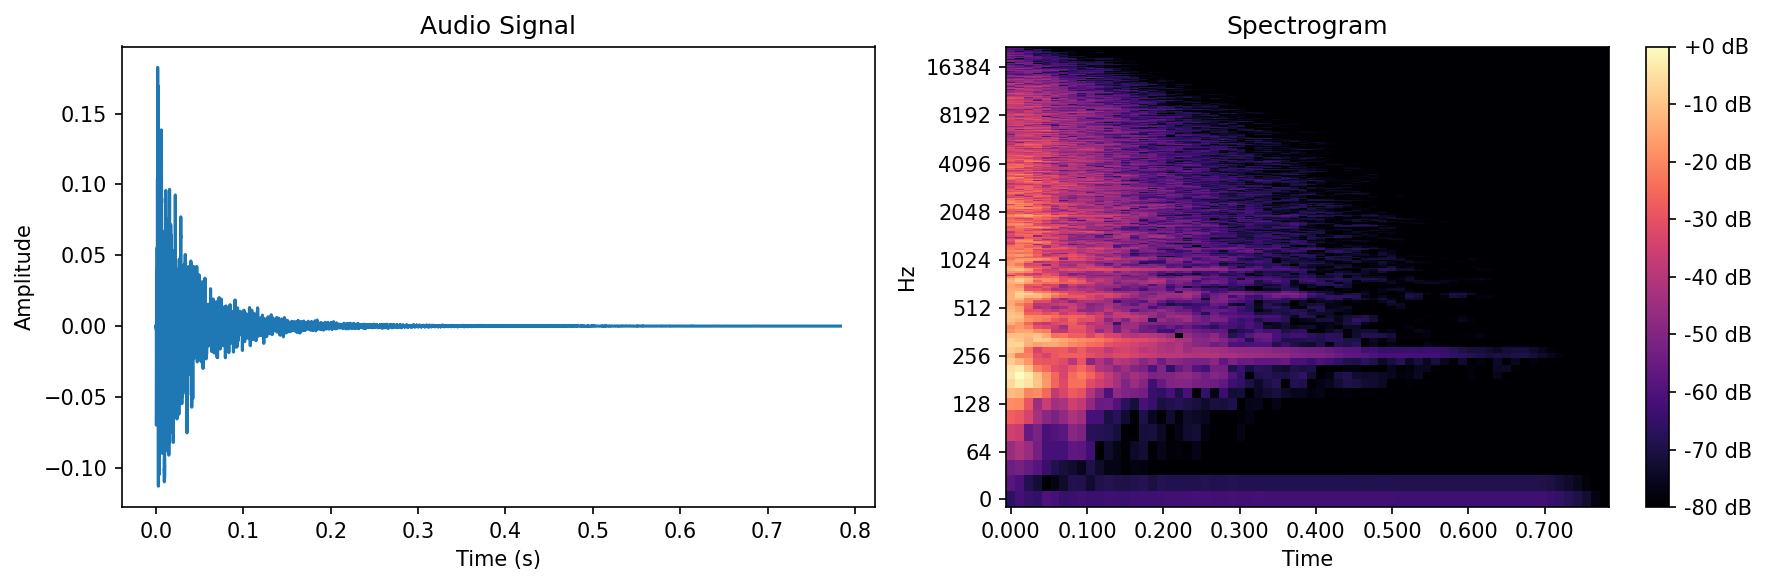

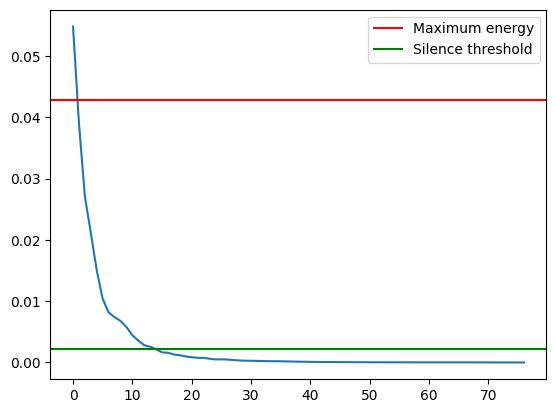

Silence proportion:  0.8051948051948052


True

In [ ]:
idx = np.random.randint(0, len(pdf_metadata_drums_2))
# idx = 0

file_path = pdf_metadata_drums_2.iloc[idx]["file_path"]

noise = open_and_plot_audio(
    file_path,
    sr)

display(Audio(noise, rate=sr))

module = CheckingIfImpulse(sr=sr, min_energy_threshold=0.05)


start = time.time()
module.forward(noise, plot_figure=True)
# print(time.time() - start)

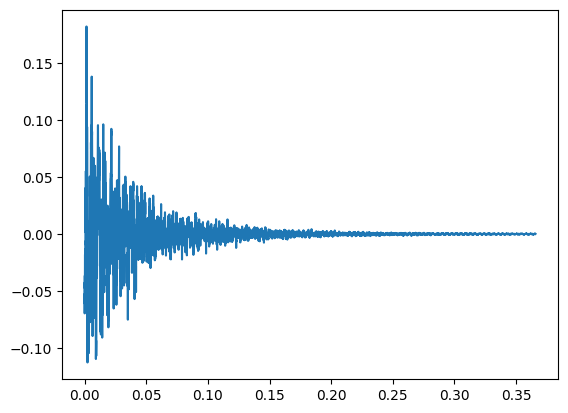

In [21]:
noise_remove_silence = remove_signal_edge_silence(
    noise.reshape(1, -1), threshold=np.max(np.abs(noise)) * 1e-4)

plt.figure()
plt.plot(np.arange(len(noise_remove_silence.flatten())) /
         sr, noise_remove_silence.flatten())

display(Audio(noise_remove_silence.flatten(), rate=sr))